# Binomial Distribution


Binomial Distribution can be viewed as a joint distribution of a series of Bernoulli distributions.

[Wiki](https://en.wikipedia.org/wiki/Binomial_distribution) outlines the following properties.

The probability mass function(PMF) is

$\begin{align*}\quad\quad
f(k) = {n \choose k} p^k q^{n-k}
\end{align*}$

where $q = 1 - p$ and $k \in [0, n]$

The cumulative distribution function is

$\begin{align*}\quad\quad
F(x) = \sum^x_{i = 0}{n \choose i} p^i q^{n-i}
\end{align*}$

## Properties
- Mean is $np$
- Variance is $npq$
- Standard Deviation is $\sqrt{np(1-p)}$
- Skewness is $\frac{q - p}{\sqrt{npq}}$
- Kurtosis is $3 - \frac{6}{n} + \frac{1}{npq}$

Moments:
- 1st moment is $np$
- 2nd moment is $n^{(2)}p^2 + np$
- 3rd moment is $n^{(3)}p^3 + 3n^{(2)}p^2 + np$
- 4th moment is $n^{(4)} + 6n^{(3)}p^3 + 7n^{(2)}p^2 + np$

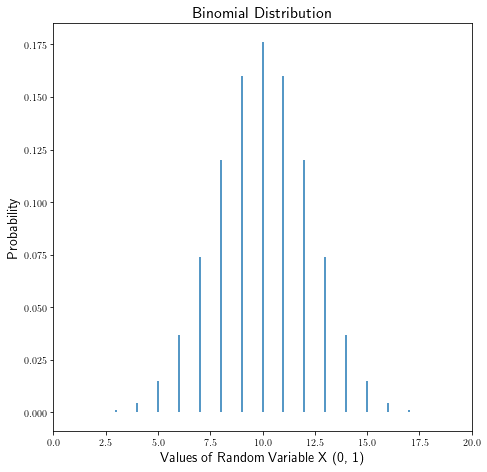

In [23]:
%reload_ext autoreload
%autoreload 2

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

plt.figure(figsize=(7.5,7.5))
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='14')
plt.ylabel('Probability', fontsize='14')

plt.xlim(0, 20)
n, p = 20, 0.5
x = np.arange(0, 20)

dist = stats.binom(n, p)
plt.title(f'Binomial Distribution', fontsize='16')

plt.vlines(x, 0, dist.pmf(x))
plt.show()

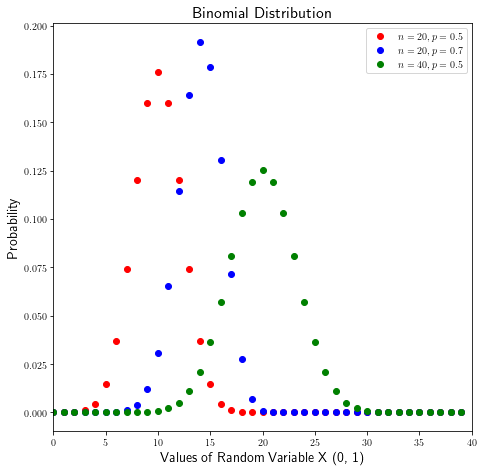

In [33]:
plt.figure(figsize=(7.5,7.5))
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='14')
plt.ylabel('Probability', fontsize='14')

plt.xlim(0, 40)
n, p = 20, 0.5
x = np.arange(0, 40)

dist = stats.binom(n, p)
plt.title(f'Binomial Distribution', fontsize='16')

plt.plot(x, stats.binom(n=20, p=0.5).pmf(x), 'ro', label=r'$n = 20, p = 0.5$',)
plt.plot(x, stats.binom(n=20, p=0.7).pmf(x), 'bo', label=r'$n = 20, p = 0.7$')
plt.plot(x, stats.binom(n=40, p=0.5).pmf(x), 'go', label=r'$n = 40, p = 0.5$')

plt.legend()
plt.show()

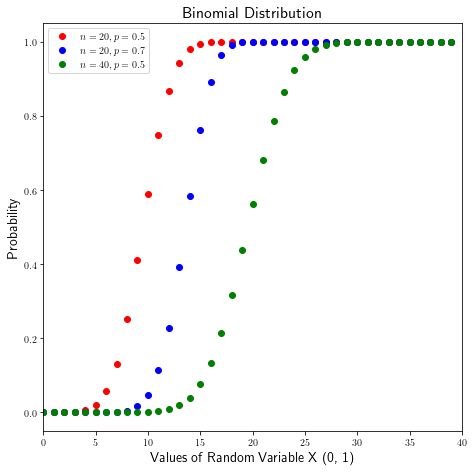

In [34]:
plt.figure(figsize=(7.5,7.5))
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='14')
plt.ylabel('Probability', fontsize='14')

plt.xlim(0, 40)
n, p = 20, 0.5
x = np.arange(0, 40)

dist = stats.binom(n, p)
plt.title(f'Binomial Distribution', fontsize='16')

plt.plot(x, stats.binom(n=20, p=0.5).cdf(x), 'ro', label=r'$n = 20, p = 0.5$',)
plt.plot(x, stats.binom(n=20, p=0.7).cdf(x), 'bo', label=r'$n = 20, p = 0.7$')
plt.plot(x, stats.binom(n=40, p=0.5).cdf(x), 'go', label=r'$n = 40, p = 0.5$')

plt.legend()
plt.show()

In [53]:
import sympy
from sympy import *
k, n= symbols('k, n', integer=True, real=True)
p = symbols('p', real=True)
# print(a.assumptions0)
pmf = sympy.binomial(n, k) * p ** k * (1 - p) ** (n - k)
# all probabilities should sum up to 1
# https://stackoverflow.com/questions/40452918/integrating-log-normal-pdf-in-sympy
sympy.Sum(pmf, (k, 0, n))
sympy.Sum(k * pmf, (k, 0, n))
# integrate(x * pdf, (x, -oo, oo))  first moment

Sum(k*p**k*(1 - p)**(-k + n)*binomial(n, k), (k, 0, n))